In [6]:
import numpy as np
import random as rd
import copy

#rd.seed(0)

size = 4#6#8

class board:
    def __init__(self,size):
        self.size = size#盤面サイズ
        #self.ban = np.array([[0,0,0,0,0,0,0,0],
        #           [0,0,0,0,0,0,0,0],
        #           [0,0,0,0,0,0,0,0],
        #           [0,0,0,1,-1,0,0,0],
        #           [0,0,0,-1,1,0,0,0],
        #           [0,0,0,0,0,0,0,0],
        #           [0,0,0,0,0,0,0,0],
        #           [0,0,0,0,0,0,0,0]])# 0:空白 1:黒 -1:白
        #self.ban = np.array([[0,0,0,0,0,0],
        #           [0,0,0,0,0,0],
        #           [0,0,1,-1,0,0],
        #           [0,0,-1,1,0,0],
        #           [0,0,0,0,0,0],
        #           [0,0,0,0,0,0]])# 0:空白 1:黒 -1:白
        self.ban = np.array([[0,0,0,0],
                   [0,1,-1,0],
                   [0,-1,1,0],
                   [0,0,0,0]])# 0:空白 1:黒 -1:白
        
        self.teban = 1 #先手:1 後手:-1
        

        
    def reverse(self,to):#置いた石に応じて石を裏返す処理
        tmp = copy.copy(self.ban)
        
        tmp[to]=self.teban#石を置く
        
        i = to[0]#行番号
        j = to[1]#列番号
        
        teki_flg = False#相手マスがあればTrue
        for k in range(i + 1):#上方向
            if (i-k) < 0 or tmp[i-k][j] == 0:#盤面外or空白があれば
                break
            if k == 1:
                if tmp[i-k][j] == self.teban:#自分の石があれば
                    break
            if tmp[i-k][j] == (-1)*self.teban:#相手の石があれば
                teki_flg = True
            elif tmp[i-k][j] == self.teban and teki_flg:#自分の石かつteki_flg=Trueならば
                for l in range(k):
                    tmp[i-k+l][j]=self.teban 
                break
        teki_flg = False#相手マスがあれば1
        for k in range(self.size - i):#下方向
            if (i+k) >= self.size or tmp[i+k][j] == 0:#盤面外or空白ならば
                break
            if k == 1:
                if tmp[i+k][j] == self.teban:#自分の石があれば
                    break
            if tmp[i+k][j] == (-1)*self.teban:#相手の石があれば
                teki_flg = True
            elif tmp[i+k][j] == self.teban and teki_flg:#自分の石かつteki_flg=Trueならば
                for l in range(k):
                    tmp[i+k-l][j]=self.teban 
                break
        teki_flg = False#相手マスがあれば1
        for k in range(j + 1):#左方向
            if (j-k) < 0 or tmp[i][j-k] == 0:#盤面外or空白ならば
                break
            if k == 1:
                if tmp[i][j-k] == self.teban:#自分の石があれば
                    break
            if tmp[i][j-k] == (-1)*self.teban:#相手の石があれば
                teki_flg = True
            elif tmp[i][j-k] == self.teban and teki_flg:#自分の石かつteki_flg=Trueならば
                for l in range(k):
                    tmp[i][j-k+l]=self.teban 
                break
        teki_flg = False#相手マスがあれば1
        for k in range(self.size - j):#右方向
            if (j+k) < 0 or tmp[i][j+k] == 0:#盤面外or空白ならば
                break
            if k == 1:
                if tmp[i][j+k] == self.teban:#自分の石があれば
                    break
            if tmp[i][j+k] == (-1)*self.teban:#相手の石があれば
                teki_flg = True
            elif tmp[i][j+k] == self.teban and teki_flg:#自分の石かつteki_flg=Trueならば
                for l in range(k):
                    tmp[i][j+k-l]=self.teban 
                break
        teki_flg = False#相手マスがあれば1
        for k in range(j + 1):#左上方向
            if (i-k) < 0 or (j-k) < 0 or tmp[i-k][j-k] == 0:#盤面外or空白ならば
                break
            if k == 1:
                if tmp[i-k][j-k] == self.teban:#自分の石があれば
                    break
            if tmp[i-k][j-k] == (-1)*self.teban:#相手の石があれば
                teki_flg = True
            elif tmp[i-k][j-k] == self.teban and teki_flg:#自分の石かつteki_flg=Trueならば
                for l in range(k):
                    tmp[i-k+l][j-k+l]=self.teban 
                break
        teki_flg = False#相手マスがあれば1
        for k in range(j + 1):#左下方向
            if (i+k) >= self.size or (j-k) < 0 or tmp[i+k][j-k] == 0:#盤面外or空白ならば
                break
            if k == 1:
                if tmp[i+k][j-k] == self.teban:#自分の石があれば
                    break
            if tmp[i+k][j-k] == (-1)*self.teban:#相手の石があれば
                teki_flg = True
            elif tmp[i+k][j-k] == self.teban and teki_flg:#自分の石かつteki_flg=Trueならば
                for l in range(k):
                    tmp[i+k-l][j-k+l]=self.teban 
                break
        teki_flg = False#相手マスがあれば1
        for k in range(self.size - j):#右上方向
            if (i-k) < 0 or (j+k) >= self.size or tmp[i-k][j+k] == 0:#盤面外or空白ならば
                break
            if k == 1:
                if tmp[i-k][j+k] == self.teban:#自分の石があれば
                    break
            if tmp[i-k][j+k] == (-1)*self.teban:#相手の石があれば
                teki_flg = True
            elif tmp[i-k][j+k] == self.teban and teki_flg:#自分の石かつteki_flg=Trueならば
                for l in range(k):
                    tmp[i-k+l][j+k-l]=self.teban 
                break
        teki_flg = False#相手マスがあれば1
        for k in range(self.size - j):#右下方向
            if (i+k) >= self.size or (j+k) >= self.size or tmp[i+k][j+k] == 0:#盤面外or空白ならば
                break
            if k == 1:
                if tmp[i+k][j+k] == self.teban:#自分の石があれば
                    break
            if tmp[i+k][j+k] == (-1)*self.teban:#相手の石があれば
                teki_flg = True
            elif tmp[i+k][j+k] == self.teban and teki_flg:#自分の石かつteki_flg=Trueならば
                for l in range(k):
                    tmp[i+k-l][j+k-l]=self.teban 
                break
        return tmp
        
    def te(self,tmp_ban):#合法手リスト作成
        te = []
        for i in range(self.size):
            for j in range(self.size):
                if tmp_ban[i][j] == self.teban:
                    teki_flg = False#相手マスがあれば1
                    for k in range(i + 1):#上方向
                        if (i-k) < 0:
                            break
                        if tmp_ban[i-k][j] == self.teban:#自分の石があれば
                            teki_flg = False
                        elif tmp_ban[i-k][j] == (-1)*self.teban:#相手の石があれば
                            teki_flg = True
                        elif tmp_ban[i-k][j] == 0:#空白ならば
                            if teki_flg == False:#teki_flg=Falseならば
                                break
                            if teki_flg == True:#teki_flg=Trueならば
                                te.append((i-k,j))
                                break
                    for k in range(self.size - i):#下方向
                        if (i+k) >= self.size:
                            break
                        if tmp_ban[i+k][j] == self.teban:#自分の石があれば
                            teki_flg = False
                        elif tmp_ban[i+k][j] == (-1)*self.teban:#相手の石があれば
                            teki_flg = True
                        elif tmp_ban[i+k][j] == 0:#空白ならば
                            if teki_flg == False:#teki_flg=Falseならば
                                break
                            if teki_flg == True:#teki_flg=Trueならば
                                te.append((i+k,j))
                                break
                    for k in range(j + 1):#左方向
                        if (j-k) < 0:
                            break
                        if tmp_ban[i][j-k] == self.teban:#自分の石があれば
                            teki_flg = False
                        elif tmp_ban[i][j-k] == (-1)*self.teban:#相手の石があれば
                            teki_flg = True
                        elif tmp_ban[i][j-k] == 0:#空白ならば
                            if teki_flg == False:#teki_flg=Falseならば
                                break
                            elif teki_flg == True:#teki_flg=Trueならば
                                te.append((i,j-k))
                                break
                    for k in range(self.size - j):#右方向
                        if (j+k) >= self.size:
                            break
                        if tmp_ban[i][j+k] == self.teban:#自分の石があれば
                            teki_flg = False
                        elif tmp_ban[i][j+k] == (-1)*self.teban:#相手の石があれば
                            teki_flg = True
                        elif tmp_ban[i][j+k] == 0:#空白ならば
                            if teki_flg == False:#teki_flg=Falseならば
                                break
                            elif teki_flg == True:#teki_flg=Trueならば
                                te.append((i,j+k))
                                break
                    for k in range(j + 1):#左上方向
                        if (i-k) < 0 or (j-k) < 0:
                            break
                        if tmp_ban[i-k][j-k] == self.teban:#自分の石があれば
                            teki_flg = False
                        elif tmp_ban[i-k][j-k] == (-1)*self.teban:#相手の石があれば
                            teki_flg = True
                        elif tmp_ban[i-k][j-k] == 0:#空白ならば
                            if teki_flg == False:#teki_flg=Falseならば
                                break
                            if teki_flg == True:#teki_flg=Trueならば
                                te.append((i-k,j-k))
                                break
                    for k in range(j + 1):#左下方向
                        if (i+k) >= self.size or (j-k) < 0:
                            break
                        if tmp_ban[i+k][j-k] == self.teban:#自分の石があれば
                            teki_flg = False
                        elif tmp_ban[i+k][j-k] == (-1)*self.teban:#相手の石があれば
                            teki_flg = True
                        elif tmp_ban[i+k][j-k] == 0:#空白ならば
                            if teki_flg == False:#teki_flg=Falseならば
                                break
                            if teki_flg == True:#teki_flg=Trueならば
                                te.append((i+k,j-k))
                                break
                    for k in range(self.size - j):#右上方向
                        if (i-k) < 0 or (j+k) >= self.size:
                            break
                        if tmp_ban[i-k][j+k] == self.teban:#自分の石があれば
                            teki_flg = False
                        elif tmp_ban[i-k][j+k] == (-1)*self.teban:#相手の石があれば
                            teki_flg = True
                        elif tmp_ban[i-k][j+k] == 0:#空白ならば
                            if teki_flg == False:#teki_flg=Falseならば
                                break
                            if teki_flg == True:#teki_flg=Trueならば
                                te.append((i-k,j+k))
                                break
                    for k in range(self.size - j):#右下方向
                        if (i+k) >= self.size or (j+k) >= self.size:
                            break
                        if tmp_ban[i+k][j+k] == self.teban:#自分の石があれば
                            teki_flg = False
                        elif tmp_ban[i+k][j+k] == (-1)*self.teban:#相手の石があれば
                            teki_flg = True
                        elif tmp_ban[i+k][j+k] == 0:#空白ならば
                            if teki_flg == False:#teki_flg=Falseならば
                                break
                            if teki_flg == True:#teki_flg=Trueならば
                                te.append((i+k,j+k))
                                break
        return te
    
    def end_judgement(self,ban):#ゲーム終了判定
        zero_flg = False
        for i in range(self.size):
            for j in range(self.size):
                if ban[i][j] == 0:
                    zero_flg = True
        if zero_flg == True:
            return 0

        return 1

    def Print_Ban(self,tesu):#盤面表示
        tmp = np.where(self.ban == 1, "o",np.where(self.ban == -1, "x", " "))
        print(tesu+1,"手目")
        if self.teban == 1:
            print("手番:先手")
        else:
            print("手番:後手")
        print(tmp)

    def Winner_Judgement(self,ban):#駒カウント
        sente_ishi = 0
        gote_ishi = 0
        for i in range(self.size):
            for j in range(self.size):
                if ban[i][j] == 1:
                    sente_ishi += 1
                if ban[i][j] == -1:
                    gote_ishi += 1
        if sente_ishi > gote_ishi:
            return 1
        elif sente_ishi < gote_ishi:
            return -1
        else:
            return 0
        
    def put(self):#石を置く関数 返り値:-1⇒１手パス 返り値:1⇒石を置く
        goho_list = self.te(self.ban);#合法手リスト取得
        goho_list = list(set(goho_list))#合法手の重複除去
        if len(goho_list) == 0:#手番パス
            self.teban *= -1
            return -1
        to = rd.choice(goho_list)#ランダム選択
        self.ban[to]=self.teban#石を置く
        
        self.ban = self.reverse(to)#石をリバース
        
        self.teban *= -1
        return 1
    
    def Q_put(self,q):#Q学習による着手決定
        goho_list = self.te(self.ban);#合法手リスト取得
        goho_list = list(set(goho_list))#合法手の重複除去
        if len(goho_list) == 0:#手番パス
            self.teban *= -1
            return -1
        max_r = 0#報酬値保存用
        best_to = rd.choice(goho_list)#ランダム選択
        rand_num = rd.random()#乱数生成
        if rand_num > q.e:
            tmp = self.teban
            for to in goho_list:#状態価値関数を基に報酬最大になる手を選択
                self.teban = tmp
                q.set_q_value(self.ban,to)#関数セット
                next_ban = self.reverse(to)
                self.teban *= -1
                next_goho_list = self.te(next_ban);#合法手リスト取得

                max_next_r = 0
                for next_to in next_goho_list:#状態価値関数を基に報酬最大になる手を選択
                    self.teban = tmp
                    q.set_q_value(next_ban,next_to)#関数セット

                    next_r = q.get_q_value(next_ban,next_to)
                    if next_r > max_next_r:
                        max_next_r = next_r
                tmp_r = q.calc_reward(self.ban,to,max_next_r)*self.teban
                if tmp_r > max_r:
                    max_reward = tmp_r
                    best_to = to
            self.teban = tmp
            
        q.s_best_te = best_to
        q.rotate_q_func(q.s_t,q.s_best_te,self.size)#局面データ複製⇒状態行動価値関数格納 工夫点2
        self.ban = self.reverse(best_to)#石をリバース
        self.teban *= -1
        return 1

class q_learn:
    def __init__(self,alpha,gamma,rd_ratio):
        self.alpha = alpha#学習率
        self.gamma = gamma#割引率
        self.e = rd_ratio#ランダム方策
        
        self.s_func = {}#状態行動価値関数 
        self.init_v = 0#初期報酬
        self.s_t = None#現時点の局面保存
        self.s_best_te = None#現時点からの最善手

        
    def set_q_value(self,x,te):#状態価値関数初期化
        x = (','.join(map(str,x))+','.join(map(str,te)))
        if self.s_func.get(x) is None:
            self.s_func[x] = self.init_v
    
    def get_q_value(self,x,te):#入力盤面の状態価値取得
        x = (','.join(map(str,x))+','.join(map(str,te)))
        if self.s_func.get(x) is None:
            self.s_func[x] = self.init_v
        return self.s_func.get(x)
    
    def last_set(self,x,te,r):
        x = (','.join(map(str,x))+','.join(map(str,te)))
        self.s_func[x] = r
    
    def calc_reward(self,ban,te,r):#現在の状態行動価値算出かつ状態行動価値関数の更新
        self.get_q_value(ban,te)
        q_t = ','.join(map(str,ban))+','.join(map(str,te))
        self.s_func[q_t] += self.alpha*(self.gamma * r - self.s_func[q_t])
        return self.s_func[q_t]
    
    def rotate_q_func(self,ban,te,size):#状態行動価値関数の複製 工夫点2

        deg = np.deg2rad(90)#90度ラジアン算出
        cos = np.cos(deg)
        sin = np.sin(deg)
        rot = np.array([[cos,(-1)*sin],
                        [sin,cos]])#回転行列

        r = self.get_q_value(ban,te)

        te_arr = np.array(te)
        offset = size/2 - 0.5 #原点移動用オフセット

        for _ in range(3):
            te_arr = te_arr - offset #平行移動
            ban = np.rot90(ban)#盤面を90度回転
            te_arr = np.dot(rot,te_arr) + offset#平行移動
            te_arr2 = [int(np.round(i)) for i in te_arr]
            self.last_set(ban,te_arr2,r)#状態行動価値関数格納
        
game_num = 10000

sente_win_num = 0#先手勝利数カウント
gote_win_num = 0#後手勝利数カウント
draw_num = 0#引き分け数カウント

step_num = []#ステップ数格納
total_win_ratio = []#学習ステップ毎の勝率格納

#学習開始
q = q_learn(0.1,0.95,0.01)

for g in range(game_num):
    ban = board(size);
    for i in range(size*size):
        q.s_t = ban.ban
        put_flg = ban.Q_put(q)
        if put_flg == 1:#局面を保存
            if ban.end_judgement(ban.ban) == 1:#終了判定
                break
    win_label = ban.Winner_Judgement(ban.ban)
    if win_label == 1:
        q.last_set(q.s_t, q.s_best_te, 100)
        sente_win_num += 1
        #print("先手の勝ち")
    elif win_label == -1:
        q.last_set(q.s_t, q.s_best_te, -100)
        gote_win_num += 1
        #print("後手の勝ち")
    else:
        draw_num += 1
        q.last_set(q.s_t, q.s_best_te, -10)# 工夫点1
        #print("引き分け")
    q.rotate_q_func(q.s_t,q.s_best_te,size)#最終局面データ複製⇒状態行動価値関数格納
    
    if g != 0 and g % 500 == 0:
        print("learn step",g,"/",game_num)
        
        
        #モンテカルロ法vsランダム対戦
        #rd.seed(0)
        eval_num = 100

        sente_win_num = 0#先手勝利数カウント
        gote_win_num = 0#後手勝利数カウント
        draw_num = 0#引き分け数カウント

        for e in range(eval_num):
            ban2 = board(size);
            for j in range(size*size):
                #ban2.Print_Ban(j)
                if ban2.teban == 1:#先手ならモンテカルロ法による着手
                    goho_list = ban2.te(ban2.ban);#合法手リスト取得
                    goho_list = list(set(goho_list))#合法手の重複除去
                    if len(goho_list) == 0:#手番パス
                        ban2.teban *= -1
                    else:
                        max_r = 0#報酬値保存用
                        best_to = rd.choice(goho_list)#ランダム選択
                        for to in goho_list:#状態価値関数を基に報酬最大になる手を選択
                            tmp_r = q.get_q_value(ban2.ban,to)*ban2.teban
                            if tmp_r > max_r:
                                max_r = tmp_r
                                best_to = to

                        ban2.ban = ban2.reverse(best_to)#石をリバース
                        ban2.teban *= -1
                elif ban2.teban == -1:#後手ならランダムによる着手
                    ban2.put()

                if ban2.end_judgement(ban2.ban) == 1:
                    break
            win_label = ban2.Winner_Judgement(ban2.ban)
            if win_label == 1:
                sente_win_num += 1
            elif win_label == -1:
                gote_win_num += 1
            else:
                draw_num += 1

        n = (sente_win_num+gote_win_num)
        sente_win = 0
        gote_win = 0
        if n != 0:
            sente_win = sente_win_num/(sente_win_num+gote_win_num)
            gote_win = gote_win_num/(sente_win_num+gote_win_num)
            print("先手勝率:",sente_win)
            print("後手勝率:",gote_win)

        step_num.append(g)
        total_win_ratio.append(sente_win)


learn step 500 / 10000
先手勝率: 0.4777777777777778
後手勝率: 0.5222222222222223
learn step 1000 / 10000
先手勝率: 0.4235294117647059
後手勝率: 0.5764705882352941
learn step 1500 / 10000
先手勝率: 0.7222222222222222
後手勝率: 0.2777777777777778
learn step 2000 / 10000
先手勝率: 0.6153846153846154
後手勝率: 0.38461538461538464
learn step 2500 / 10000
先手勝率: 0.6153846153846154
後手勝率: 0.38461538461538464
learn step 3000 / 10000
先手勝率: 0.5842696629213483
後手勝率: 0.4157303370786517
learn step 3500 / 10000
先手勝率: 0.6626506024096386
後手勝率: 0.3373493975903614
learn step 4000 / 10000
先手勝率: 0.6588235294117647
後手勝率: 0.3411764705882353
learn step 4500 / 10000
先手勝率: 0.7093023255813954
後手勝率: 0.29069767441860467
learn step 5000 / 10000
先手勝率: 0.6739130434782609
後手勝率: 0.32608695652173914
learn step 5500 / 10000
先手勝率: 0.7666666666666667
後手勝率: 0.23333333333333334
learn step 6000 / 10000
先手勝率: 0.7108433734939759
後手勝率: 0.2891566265060241
learn step 6500 / 10000
先手勝率: 0.6904761904761905
後手勝率: 0.30952380952380953
learn step 7000 / 10000
先手勝率: 0.6

## 結果3

Text(0, 0.5, 'win_ratio')

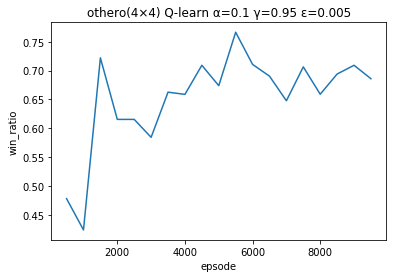

In [7]:
import matplotlib.pyplot as plt
#勝率推移グラフ
plt.plot(step_num,total_win_ratio)
plt.title("othero(4×4) Q-learn α=0.1 γ=0.95 ε=0.01")
plt.xlabel("epsode")
plt.ylabel("win_ratio")

### 結果3の考察<br />
結果1と比較すると初期エピソードの段階で勝率7割と、上回る結果となった。<br />
これは割引率を増やすことで次の状態で得られる報酬を意識した行動選択ができたためでないかと推測される。<br />